<a href="https://colab.research.google.com/github/OllyMuh/ML_algorythms/blob/main/HW_1_algorithms_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 1. Алгоритм линейной регрессии. Градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# функции расчета ошибок регрессии

# средняя абсолютная ошибка
# MAE (Mean Absolute Error)
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

# средквадратичная ошибка
# MSE (Mean Squared Error)
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

# Задача 1. 
Подберите скорость обучения (alpha) и количество итераций.

In [ ]:
n = X.shape[1]
alpha = 1e-1
# изменила на 1е-1
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(150):
  # изменила с 100 на 150, т.к. при изменении на 1000 или на 10000 разницы особо нет
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.3279203642668515e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159486e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500124e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476035e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283986e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874479e+19
Iteration #90: W_new = [116395.49978363 641638.79866064], MSE = 31317286806394.58
Iteration #100: W_new = [48.41959619 22.99885147], MSE = 53518.86
Iteration #110: W_new = [44.97711111  3.827

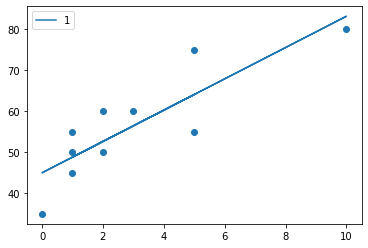

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred, label='1')
plt.legend()
plt.show()

# Задача *2. 
В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
        # W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    # исправила с помощью матричных операций
    for j in range(len(W)):
      W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


# Задача *3. 
Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [ ]:
n = X.shape[1]
alpha = 1e-1
W = np.array([1, 0.5])
W_pred = np.array([0, 0])

# инициализируем число итераций
iter_num = 0
# максимальное число итераций
max_iter = 1e4

# зададим начальную разницу весов большим числом
weight_dist = np.inf
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
      W_pred[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
      weight_dist = abs(W[k]- W_pred[k])

    print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    print(weight_dist)
    iter_num += 1
    W_pred = W


# не получается. Доходит только до второй итерации(((

Добрый день!
В задании 2 необходимо было заменить цикл на матричные операции: ваше решение возможно, когда у вас 2 веса, но если их будет 100, то, к сожалению, так расписывать каждый будет затратно. С помощью матричных операций можно за одну строку обновлять сразу все веса.
В вашем задании 3 у вас следующая концептуальная ошибка: вы не сохраняете все разности между весами, а оставляете только разность между последним по порядку весом (так как вы в цикле каждый раз перезаписываете переменную weight_dist). Кроме того, у вас алгоритм выходит сразу из цикла, так как вы запутались с переменными W и W_pred: вы должны сохранять предыдущее значение веса в W_pred, а обновлять именно W, но у вас это не происходит.